In [1]:
#initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Importing the dataset  
df = pd.read_csv('Credit_Card_Customer_Data.csv')  

In [4]:
x = df.iloc[:, [2, 5]].values  

C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

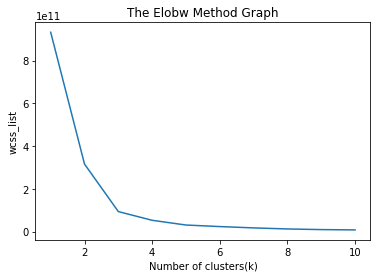

In [5]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [6]:
# #dataset panda dataframe
# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
# })

In [6]:
# define random seed as 200
np.random.seed(200)
# number of clusters we want
k = 3
# centroids[i] = [x, y] choose first centroid
centroids = {
    # select random number from 0 to 80
    i+1: [np.random.randint(0, 250000), np.random.randint(0, 20)]
    for i in range(k)
}

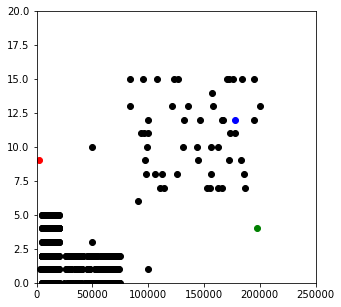

In [7]:
fig = plt.figure(figsize=(5,5))
# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 250000)
plt.ylim(0, 20)
plt.show()

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  distance_form_1  \
0                  1                    1                 0     98182.000326   
1                  0                   10                 9     48182.000010   
2                  1                    3                 4     48182.000374   
3                  1                    1                 4     28182.001135   
4                  0                   12                 3     98182.000046   

   distance_form_2  distance_form_3  closest color  
0     97392.000046     77847.000777        3     b  
1    147392.000122    127847

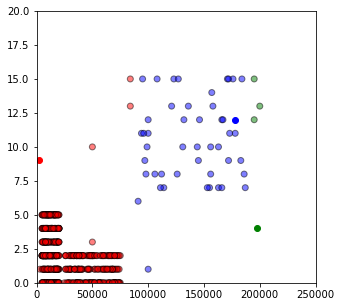

In [8]:
# assign stage assign each value to cluster
def assignment(df, centroids):
  for i in centroids.keys():
    # sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['Avg_Credit_Limit'] - centroids[i][0]) ** 2 + (df['Total_visits_online'] - centroids[i][1]) ** 2
        )
    )

  centroid_distance_cols = ['distance_form_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_form_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 250000)
plt.ylim(0, 20)
plt.show()

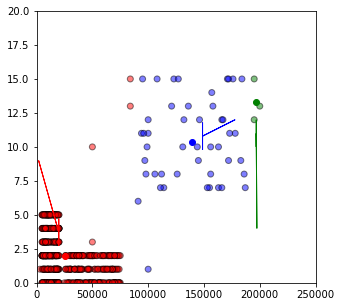

In [9]:
# centroids are updates
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['Avg_Credit_Limit'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['Total_visits_online'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 250000)
plt.ylim(0, 20)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

plt.show()

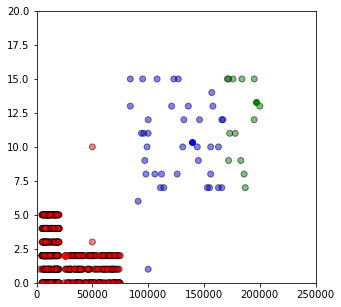

In [10]:
# repeat assignment stage
df = assignment(df, centroids)

# plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 250000)
plt.ylim(0, 20)
plt.show()

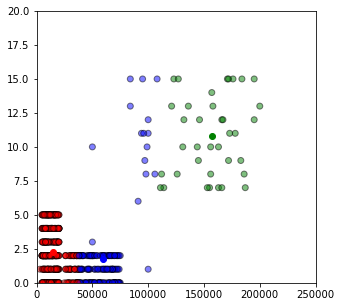

In [11]:
# continue untill all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 250000)
plt.ylim(0, 20)
plt.show()

In [12]:
# df = pd.DataFrame({
#     'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
#     'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24],
# })

# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# # store values of x and y cordinates variables
# kmeans.fit(df)

In [13]:
# Importing the dataset  
df = pd.read_csv('Credit_Card_Customer_Data.csv')  
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# store values of x and y cordinates variables
kmeans.fit(df)

C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

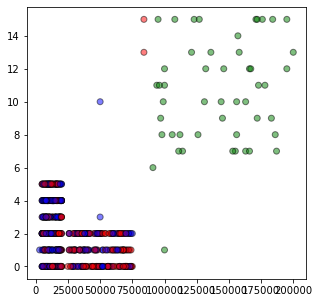

In [15]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['Avg_Credit_Limit'], df['Total_visits_online'], color=colors1, alpha=0.5, edgecolor='k')


for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

# for i in centroids.keys():
#   plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 250000)
plt.ylim(0, 20)
plt.show()